In [89]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy
%matplotlib inline
sns.set()

In [90]:
df = pd.read_csv("smartmeter_all.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

In [91]:
df.head()

,datetime,weather,max_temp,min_temp,day_length,daily_usage,hourly_usage,is_weekend,is_holiday
0,2017-01-01 00:00:00,Sunny,14,1,9.0,5.9,0.1,1,0
1,2017-01-01 01:00:00,Sunny,14,1,9.0,5.9,0.2,1,0
2,2017-01-01 02:00:00,Sunny,14,1,9.0,5.9,0.2,1,0
3,2017-01-01 03:00:00,Sunny,14,1,9.0,5.9,0.2,1,0
4,2017-01-01 04:00:00,Sunny,14,1,9.0,5.9,0.2,1,0


In [92]:
# daily_usage = df[['daily_usage']]
# pd.plotting.autocorrelation_plot(daily_usage)

In [93]:
df['date'] = df.datetime.dt.date

In [103]:
df2 = df.groupby('date')['daily_usage'].mean().reset_index()
df2.rename(columns={"date": "ds", "daily_usage": "y"}, inplace=True)

In [104]:
from fbprophet import Prophet
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df2)

In [105]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1090,2019-12-27,13.395361,7.516826,19.040414
1091,2019-12-28,14.824100,9.318473,20.573175
1092,2019-12-29,14.236587,8.441078,20.191756
1093,2019-12-30,13.323159,7.424002,19.411709
1094,2019-12-31,13.099206,7.072686,18.795059


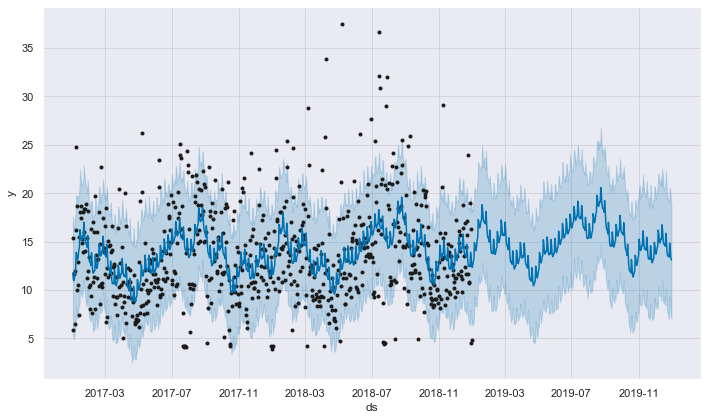

In [106]:
fig1 = m.plot(forecast)

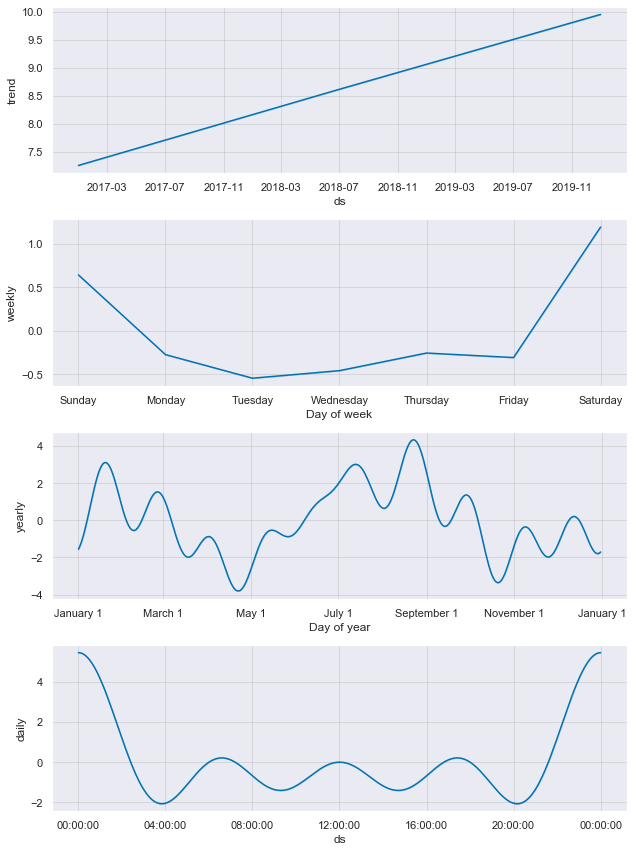

In [107]:
fig2 = m.plot_components(forecast)

In [108]:
# # df2.head()
forecast_last = forecast[['ds','yhat']].tail(365)
forecast_last.rename(columns={'yhat':'y'}, inplace=True)


In [87]:
# from statsmodels.graphics.tsaplots import plot_acf
# plot_acf(x)

In [109]:
df_final = pd.concat([df2, forecast_last])
df_final.to_csv('phophet_forecast.csv', index=False)

In [111]:
df2.to_csv("prophet_input.csv", index=False)

In [125]:
df3 = df[['datetime', 'hourly_usage']]
df3.rename(columns={'datetime':'ds', 'hourly_usage':'y'}, inplace=True)
df3.to_csv('prophet_granular_input.csv', index=False)

In [112]:
df.head()

,datetime,weather,max_temp,min_temp,day_length,daily_usage,hourly_usage,is_weekend,is_holiday,date
0,2017-01-01 00:00:00,Sunny,14,1,9.0,5.9,0.1,1,0,2017-01-01
1,2017-01-01 01:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
2,2017-01-01 02:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
3,2017-01-01 03:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
4,2017-01-01 04:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01


In [114]:
## Training 

In [115]:
import numpy as np 
import pandas as pd
import datetime as dt 
import lightgbm as lgb 
import math 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,mean_squared_log_error,median_absolute_error,r2_score
import warnings 
warnings.filterwarnings("ignore")


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



In [116]:
df.head()

,datetime,weather,max_temp,min_temp,day_length,daily_usage,hourly_usage,is_weekend,is_holiday,date
0,2017-01-01 00:00:00,Sunny,14,1,9.0,5.9,0.1,1,0,2017-01-01
1,2017-01-01 01:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
2,2017-01-01 02:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
3,2017-01-01 03:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01
4,2017-01-01 04:00:00,Sunny,14,1,9.0,5.9,0.2,1,0,2017-01-01


In [118]:
df['date']  = df.datetime.dt.day

In [120]:
df['dow'] = df.datetime.dt.weekday

In [121]:
df['month'] = df.datetime.dt.month

In [123]:
df['hod'] = df.datetime.dt.hour

In [126]:
df_model = df[['weather', 'max_temp','min_temp','day_length','is_weekend','is_holiday','date','dow','month','hod']]

In [127]:
df_model.head()

,weather,max_temp,min_temp,day_length,is_weekend,is_holiday,date,dow,month,hod
0,Sunny,14,1,9.0,1,0,1,6,1,0
1,Sunny,14,1,9.0,1,0,1,6,1,1
2,Sunny,14,1,9.0,1,0,1,6,1,2
3,Sunny,14,1,9.0,1,0,1,6,1,3
4,Sunny,14,1,9.0,1,0,1,6,1,4
